# Let's Inspect Some Lightcurves!

In [78]:
import glob
import pandas as pd
pd.options.display.max_columns = 100
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("paper",font_scale=1.8)
sns.set_style("whitegrid")

#Live dangerously
import warnings
warnings.filterwarnings("ignore")

In [28]:
df_colman=pd.read_csv('/Users/msoaresfurtado/Dropbox/Research_NGC6791/Notebooks/ColmanTable_NGC6791_FullTable.dat',\
                     delim_whitespace=True)
print(len(df_colman))
df_colman[0:10]

1384


,RA,DEC,KEPID,mmd_flux,mmd_mag,GaiaID,KIC,TIC,Vmag,Jmag,Kmag,kepmag,Imag,Rmag,Bmag,Gmag,bp_rp,pmra,pmdec,pmra_error,pmdec_error,radial_velocity,rv_template_logg,rv_template_fe_h,Rad,Mass,Lum,logg,LClass,astrometric_excess_noise,Teff,distance,e_Dist,a_g_val,parallax,parallax_error,ProbCluster,phot_variable_flag
0,290.143494,37.695015,2297113,0.002837,0.003081,2051286516703820800,2297113,122365243,17.69,15.96,15.68,17.404,16.79,16.71,17.78,17.604105,0.955750,-0.431510,-2.510611,0.175214,0.201662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.213420,NaN,0.000642,0,NaN,0.155937,0.118379,1.0,0
1,290.145233,37.696278,2297125,0.003733,0.004052,2051286520994703488,2297125,1876768064,19.38,19.73,NaN,17.797,17.97,18.28,20.14,19.104200,1.122255,-0.060361,-3.141069,0.433938,0.493377,NaN,NaN,NaN,NaN,0.93,NaN,NaN,0,0.000000,NaN,0.000889,0,NaN,-0.236977,0.318824,0.0,0
2,290.149750,37.690624,2297143,0.003697,0.004013,2051286516693478272,2297143,122365263,17.79,16.19,15.24,17.647,16.74,17.40,18.10,17.589773,1.127913,-0.357800,-2.434853,0.184330,0.186677,NaN,NaN,NaN,NaN,0.84,NaN,NaN,0,0.323324,NaN,0.000750,0,NaN,0.261520,0.116557,1.0,0
3,290.154907,37.676281,2297168,0.002787,0.003025,2051286417915485568,2297168,122365314,17.99,16.66,15.74,17.858,17.23,17.15,18.30,17.793438,1.083685,-0.436087,-2.245171,0.200551,0.195130,NaN,NaN,NaN,NaN,0.89,NaN,NaN,0,0.000000,NaN,0.000839,0,NaN,0.239761,0.131209,1.0,0
4,290.155701,37.696812,2297175,0.002404,0.002610,2051286516693495552,2297175,122365237,17.51,15.85,15.75,17.368,16.02,16.40,18.00,17.307590,1.125736,-0.273138,-2.425938,0.141692,0.145645,NaN,NaN,NaN,NaN,0.84,NaN,NaN,0,0.000000,NaN,0.000642,0,NaN,0.362369,0.094566,0.9,0
5,290.161469,37.694687,2297206,0.004944,0.005371,2051286447974019072,2297206,1876768029,18.84,19.25,NaN,18.288,17.69,17.90,19.84,18.609615,1.199158,-0.310281,-3.298514,0.311087,0.341662,NaN,NaN,NaN,NaN,0.89,NaN,NaN,0,0.000000,NaN,0.001091,0,NaN,-0.374205,0.217478,0.0,0
6,290.161865,37.667397,2297209,0.001327,0.001441,2051098745026762496,2297209,122365352,17.50,16.03,15.54,17.386,15.77,16.80,17.60,17.299599,1.114731,-0.307512,-2.542632,0.142697,0.147163,NaN,NaN,NaN,NaN,0.90,NaN,NaN,0,0.000000,NaN,0.000956,0,NaN,0.088872,0.090049,1.0,0
7,290.168213,37.670891,2297257,0.005338,0.005795,2051098775087323904,2297257,1876763399,18.20,18.92,NaN,17.876,17.27,17.69,19.12,18.018766,1.086716,-0.445411,-2.295556,0.217619,0.227574,NaN,NaN,NaN,NaN,0.92,NaN,NaN,0,0.251856,NaN,0.000768,0,NaN,0.106697,0.140641,0.0,0
8,290.171143,37.688679,2297273,0.002508,0.002722,2051286830232352512,2297273,122365269,17.71,15.98,15.46,16.791,16.55,16.47,17.50,17.506653,1.085642,-0.412900,-2.367537,0.164903,0.165706,NaN,NaN,NaN,NaN,0.87,NaN,NaN,0,0.000000,NaN,0.000702,0,NaN,0.333861,0.112486,1.0,0
9,290.174347,37.665672,2297297,0.001719,0.001867,2051098710667033088,2297297,122365360,17.39,15.88,15.39,17.294,16.52,17.10,18.19,17.219600,0.988176,-0.267339,-2.355052,0.130486,0.137666,NaN,NaN,NaN,NaN,1.00,NaN,NaN,0,0.074884,NaN,0.000819,0,NaN,0.122624,0.085723,1.0,0


In [98]:
df_colman_header=pd.read_csv('ColmanTable_NGC6791.txt',delim_whitespace=True)
df_colman_header[:10]

,RA_OBJ,DEC_OBJ,KEPLERID,Quarter,EXPOSURE,CLUSTER,mmd_flux,mmd_mag
0,290.143494,37.695015,2297113,17.0,24.456804,NGC 6791,0.002837,0.003081
1,290.145233,37.696278,2297125,17.0,24.456804,NGC 6791,0.003733,0.004052
2,290.149750,37.690624,2297143,17.0,24.456804,NGC 6791,0.003697,0.004013
3,290.154907,37.676281,2297168,17.0,24.456804,NGC 6791,0.002787,0.003025
4,290.155701,37.696812,2297175,17.0,24.456804,NGC 6791,0.002404,0.002610
5,290.161469,37.694687,2297206,17.0,24.456804,NGC 6791,0.004944,0.005371
6,290.161865,37.667397,2297209,17.0,24.456806,NGC 6791,0.001327,0.001441
7,290.168213,37.670891,2297257,17.0,24.456806,NGC 6791,0.005338,0.005795
8,290.171143,37.688679,2297273,17.0,24.456804,NGC 6791,0.002508,0.002722
9,290.174347,37.665672,2297297,17.0,24.456806,NGC 6791,0.001719,0.001867


In [25]:
df_cat=pd.read_csv('gaia_full_transformed_to_astrometricref.txt',delim_whitespace=True,\
                   header=None,names=['GaiaID','RA','DEC','Gmag','xi','eta','xcoord','ycoord'])
len(df_cat)

103538

In [26]:
df_cat[0:10]

,GaiaID,RA,DEC,Gmag,xi,eta,xcoord,ycoord
0,205257486945210700,291.180544,37.995637,19.078783,0.535985,-0.342057,793.402809,1044.61697
1,205257387301919987,291.123552,37.898824,20.107964,0.491721,-0.439185,711.863930,1096.31531
2,205257696538903014,291.268650,38.073869,19.822750,0.604767,-0.263283,884.484639,1018.91874
3,205254954631946905,291.134006,37.853499,20.593960,0.500280,-0.484453,696.007968,1134.81782
4,205254978683463155,291.086463,37.834497,18.632442,0.462860,-0.503702,658.111980,1130.92327
5,205257696538903027,291.264510,38.073844,20.323517,0.601509,-0.263336,881.986293,1017.35031
6,205257607204319564,291.211301,37.989179,20.178953,0.560272,-0.348333,808.732490,1061.35679
7,205254790135014592,290.950966,37.760572,19.312082,0.356205,-0.578226,540.392456,1134.70879
8,205257308274108032,291.160393,37.882913,18.992191,0.520905,-0.454894,726.251680,1122.61569
9,205254848116567232,291.010443,37.812391,20.855505,0.402942,-0.526163,601.559063,1118.35524


In [27]:
df_evan=pd.read_csv('/Users/msoaresfurtado/Dropbox/Research_NGC6791/colman_wocs_gaia.csv',\
                    names=['KIC','WOCS','GaiaID','Gmag','RA','DEC'],skiprows=1)
df_evan = df_evan.dropna()
df_evan['GaiaID'] = df_evan['GaiaID'].astype(int)
print('Total Sources =',len(df_evan))
df_evan[0:10]

Total Sources = 36


,KIC,WOCS,GaiaID,Gmag,RA,DEC
1,2570281,83740.0,2051296176081698816,19.023773,290.259806,37.894587
2,2437338,69861.0,2051293289863231232,16.715780,290.215428,37.802049
3,2436421,64067.0,2051288067182949888,14.950779,290.145732,37.764532
4,2437762,64589.0,2051105376456446976,17.884123,290.258426,37.760225
5,2569494,77857.0,2051294423734919680,17.316122,290.178863,37.848950
6,2437749,61180.0,2051105342096681728,16.227480,290.248895,37.747344
7,2297488,53057.0,2051099221763945984,17.438665,290.215960,37.692157
8,2436804,57059.0,2051286933311580160,16.069212,290.180742,37.721427
9,2437060,66212.0,2051293186783992320,17.162016,290.198259,37.778237
10,2437079,69004.0,2051293255503480320,16.805622,290.201645,37.792628


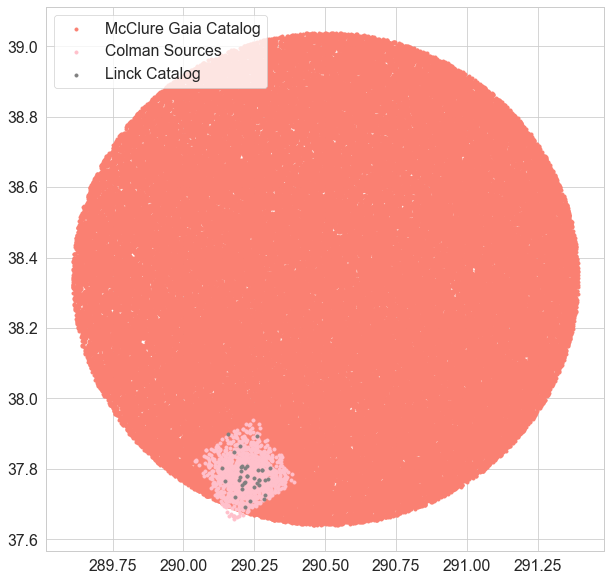

In [33]:
plt.figure(figsize=(10,10))
plt.scatter(df_cat.RA,df_cat.DEC,color='salmon',label='McClure Gaia Catalog',s=10)
plt.scatter(df_colman.RA,df_colman.DEC,color='pink',label='Colman Sources',s=10)
plt.scatter(df_evan.RA,df_evan.DEC,color='grey',label='Linck Catalog',s=10)
plt.legend()

In [92]:
from astropy.table import Table
t_lc = Table(names=('GaiaID','KIC','KIC2','KIC3','RA','DEC','Gmag','lc'), \
             dtype=('i8','int32','int32','f4','f4','f4','f4','S18'))

from astroquery.vizier import Vizier
from astropy import units as u
v=Vizier(catalog=['V/133/kic'])    

plot=0

lightcurves=sorted(glob.glob("/Users/msoaresfurtado/Dropbox/Research_NGC6791/Notebooks/b0i0d10/*.rlc"))
print('total lightcurves =',len(lightcurves))
for lc in lightcurves:
    df=pd.read_table(lc,delim_whitespace=True,header=None)
    GaiaID=(df[1][0])
    print(GaiaID)    
    itemindex = np.where(GaiaID==df_cat['GaiaID'])
    itemindex=itemindex[0]
    RA=float(df_cat['RA'][itemindex])
    DEC=float(df_cat['DEC'][itemindex])
    Gmag=float(df_cat['Gmag'][itemindex])
    LCfile=lc
    KIC=KIC2=KIC3=-999
    coords=str(RA)+' '+str(DEC)
    result = v.query_region(coords,radius=0.05*u.arcmin)
    if (len(result)>0):
        if (abs(result[0][0]['gmag']-Gmag)/Gmag*100<20): #20% mag difference at most
            KIC=(result[0][0]['KIC'])
            print(KIC)
    #let's find a match in Evan's file
    itemindex2 = np.where(GaiaID==df_evan['GaiaID'])
    itemindex2=itemindex2[0]
    if itemindex2>0:
        KIC2=df_evan['KIC'][itemindex2][0]
    #let's find a match in Colman's file
    itemindex3 = np.where(GaiaID==df_colman['GaiaID'])
    itemindex3=itemindex3[0]
    if itemindex3>0:
        KIC3=df_colman['KIC'][itemindex3][0]
    t_lc.add_row((GaiaID,KIC,KIC2,KIC3,RA,DEC,Gmag,LCfile))
    if plot==1:
        plt.scatter(df[0],df[10],s=10)
        plt.xlabel('Cadence Number')
        plt.ylabel('Kepler Magnitude')
        plt.xlim(15100,15200)
        title_out='Gaia ID:'+str(GaiaID)+' \n Kepler ID:' +str(KIC)
        plt.title(title_out)
        plt.show()
        outfile='LC_images/'+str(GaiaID)+'.png'
        plt.savefig(outfile)
        plt.close()

total lightcurves = 52
205109901560551321
[81770] 290.2321224 37.68913125 18.090912 /Users/msoaresfurtado/Dropbox/Research_NGC6791/Notebooks/b0i0d10/205109901560551321.rlc
2297634
2297634 -999
2297634 -999 -999
205109922606316761
[79726] 290.21156010000004 37.69690665 17.307377 /Users/msoaresfurtado/Dropbox/Research_NGC6791/Notebooks/b0i0d10/205109922606316761.rlc
2297509
2297509 -999
2297509 -999 -999
205110520036071628
[79787] 290.2310607 37.73493784 17.242687 /Users/msoaresfurtado/Dropbox/Research_NGC6791/Notebooks/b0i0d10/205110520036071628.rlc
2437518
2437518 -999
2437518 -999 -999
205110520465263104
[79440] 290.2327334 37.73222241 18.935833 /Users/msoaresfurtado/Dropbox/Research_NGC6791/Notebooks/b0i0d10/205110520465263104.rlc
2437540
2437540 -999
2437540 -999 -999
205110523901746073
[77400] 290.2393023 37.75232372 16.619905 /Users/msoaresfurtado/Dropbox/Research_NGC6791/Notebooks/b0i0d10/205110523901746073.rlc
2437634
2437634 -999
2437634 -999 -999
205110527337721408
[80458] 290

205129366782037862
[84772] 290.2827372 37.84272762 17.111114999999998 /Users/msoaresfurtado/Dropbox/Research_NGC6791/Notebooks/b0i0d10/205129366782037862.rlc
2570448
2570448 -999
2570448 -999 -999
205129401141294899
[88588] 290.18258030000004 37.80360978 18.36784 /Users/msoaresfurtado/Dropbox/Research_NGC6791/Notebooks/b0i0d10/205129401141294899.rlc
2569524
2569524 -999
2569524 -999 -999
205129407583626150
[83824] 290.1677619 37.81619013 17.652620000000002 /Users/msoaresfurtado/Dropbox/Research_NGC6791/Notebooks/b0i0d10/205129407583626150.rlc
2569391
2569391 -999
2569391 -999 -999
205129407583627532
[86621] 290.1712983 37.81784189 17.103466 /Users/msoaresfurtado/Dropbox/Research_NGC6791/Notebooks/b0i0d10/205129407583627532.rlc
2569433
2569433 -999
2569433 -999 -999
205129414885200358
[83663] 290.21038660000005 37.82414227 19.641453 /Users/msoaresfurtado/Dropbox/Research_NGC6791/Notebooks/b0i0d10/205129414885200358.rlc
2569792
2569792 -999
2569792 -999 -999
205129428629592448
[87257] 29

In [93]:
t_lc.show_in_browser(jsviewer=True)

For some reason, none of these sources are in Evan's database...

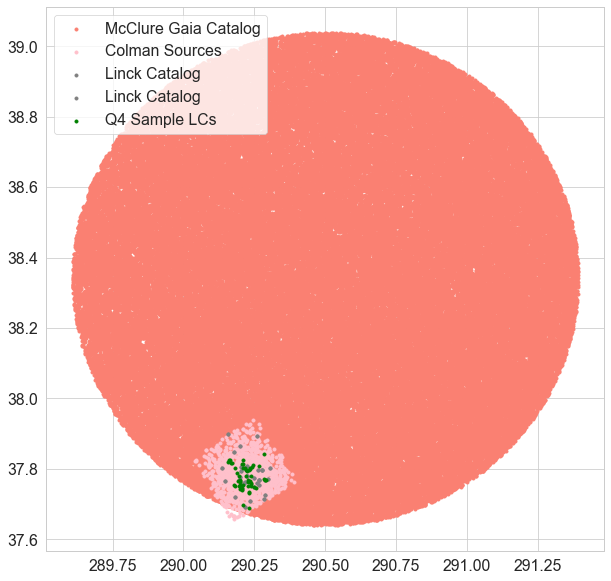

In [81]:
plt.figure(figsize=(10,10))
plt.scatter(df_cat.RA,df_cat.DEC,color='salmon',label='McClure Gaia Catalog',s=10)
plt.scatter(df_colman.RA,df_colman.DEC,color='pink',label='Colman Sources',s=10)
plt.scatter(df_evan.RA,df_evan.DEC,color='grey',label='Linck Catalog',s=10)
plt.scatter(df_evan.RA,df_evan.DEC,color='grey',label='Linck Catalog',s=10)
plt.scatter(t_lc['RA'],t_lc['DEC'],color='green',label='Q4 Sample LCs',s=10)
plt.legend()

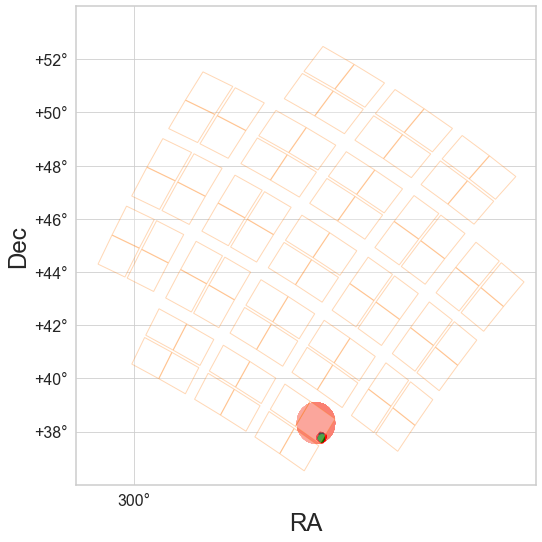

In [88]:
from K2fov import plot
import matplotlib.patheffects as path_effects

t = Table.read('ColmanTable_NGC6791.txt', format='ascii')
t[0:3]

CAMPAIGN = 1000

colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

p = plot.K2FootprintPlot(figsize=(8,8))
campaigns = np.arange(0, CAMPAIGN+1)
p.plot_campaign(CAMPAIGN, annotate_channels=False, facecolor='white',
                lw=1, edgecolor=colors[1], zorder=2,alpha=0.3)


plt.scatter(df_cat.RA,df_cat.DEC,color='salmon',label='McClure Gaia Catalog',s=10)
plt.scatter(df_colman.RA,df_colman.DEC,color='red',label='Colman Sources',s=10)
plt.scatter(df_evan.RA,df_evan.DEC,color='black',label='Linck Catalog',s=10)
plt.scatter(t_lc['RA'],t_lc['DEC'],color='green',label='Q4 Sample LCs',s=10)

plt.xlim([303, 279])
plt.ylim([36.01, 53.99])
plt.tight_layout()

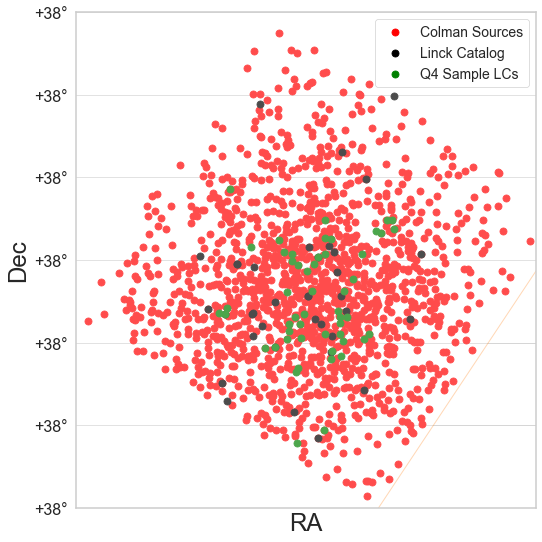

In [90]:
from K2fov import plot
import matplotlib.patheffects as path_effects

t = Table.read('ColmanTable_NGC6791.txt', format='ascii')
t[0:3]
CAMPAIGN = 1000

colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

p = plot.K2FootprintPlot(figsize=(8,8))
campaigns = np.arange(0, CAMPAIGN+1)
p.plot_campaign(CAMPAIGN, annotate_channels=False, facecolor='white',
                lw=1, edgecolor=colors[1], zorder=2,alpha=0.3)

plt.scatter(df_colman.RA,df_colman.DEC,color='red',label='Colman Sources',s=50)
plt.scatter(df_evan.RA,df_evan.DEC,color='black',label='Linck Catalog',s=50)
plt.scatter(t_lc['RA'],t_lc['DEC'],color='green',label='Q4 Sample LCs',s=50)

plt.legend()
plt.ylim([37.65, 37.95])
plt.xlim([290.4, 290.05])
plt.tight_layout()

In [99]:
fitsfilesin=glob.glob('/Users/msoaresfurtado/Dropbox/Research_NGC6791/Colman_stitched2/*.fits') 
print('There are ',len(fitsfilesin),'total fits files in this directory')
print('The first file is listed as: \n    ', fitsfilesin[0])

There are  1384 total fits files in this directory
The first file is listed as: 
     /Users/msoaresfurtado/Dropbox/Research_NGC6791/Colman_stitched2/hlsp_iris_kepler_phot_kplr2438079-stitched_kepler_v1.0_lc.fits


In [ ]:
import os
from astropy.io import fits
a=0
problems=[2437033,2438165,2436962,2569787,2297509,2437831]

for i in range(1,len(t_lc)):
    Kepid=int(t_lc['KIC'][i])
    print(Kepid)
    if (Kepid in problems ):
        continue
    else:
        Colmanfile='/Users/msoaresfurtado/Dropbox/Research_NGC6791/Colman_stitched2/hlsp_iris_kepler_phot_kplr'+str(Kepid)+'-stitched_kepler_v1.0_lc.fits'
        if os.path.exists(Colmanfile):
            a=a+1
            hdulist = fits.open(Colmanfile)
            hdu1=hdulist[1].header
            binaryext = hdulist[1].data
            binarytable = Table(binaryext)
            #BJDREF=2454833
            colman_mags=-2.5*np.log10(binarytable['CORRECTED FLUX'])
            plt.scatter(binarytable['TIME'],binarytable['CORRECTED FLUX'],s=2,label='Colman')
            df=pd.read_table(t_lc['lc'][i],delim_whitespace=True,header=None)
            time=df[0]*0.5/24    
            cols=[10,13,16,19]
            mask = df[cols].applymap(lambda x: isinstance(x, (int, float)))
            df[cols] = df[cols].where(mask)
            df[10]=df[10]/np.nanmedian(df[10])-1
            plt.scatter(time,df[10],s=5,label='ap1')
            df[13]=df[13]/np.nanmedian(df[13])-1
            plt.scatter(time,df[13],s=5,label='ap2')
            df[16]=df[16]/np.nanmedian(df[16])-1
            plt.scatter(time,df[16],s=5,label='ap3')
            df[19]=df[19]/np.nanmedian(df[19])-1
            plt.scatter(time,df[19],s=5,label='ap4')
            plt.legend(loc='upper right')
            plt.title('Kepid='+str(Kepid))
            plt.ylabel('Normalized Kepler Magnitude')
            plt.xlabel('Time - 2454833')
            plt.show()
            plt.close()
print('percent matches:',round(a/len(t_lc)*100),'%')

2437634


/Users/msoaresfurtado/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


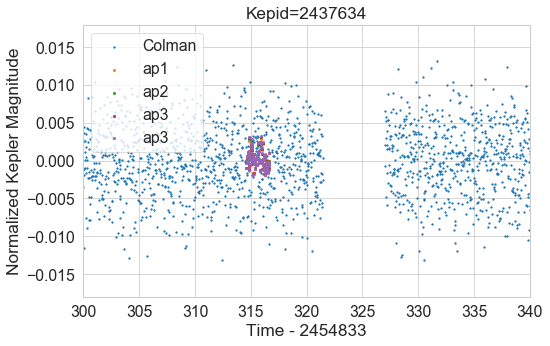

2437830
2437596
2437737
2438155


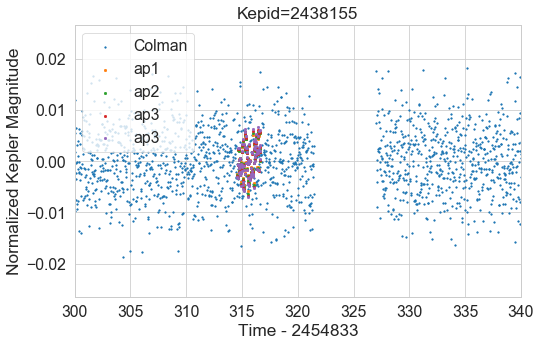

2438165
2438198
2437130
2437010
2437017
2436791
2436749
2437142


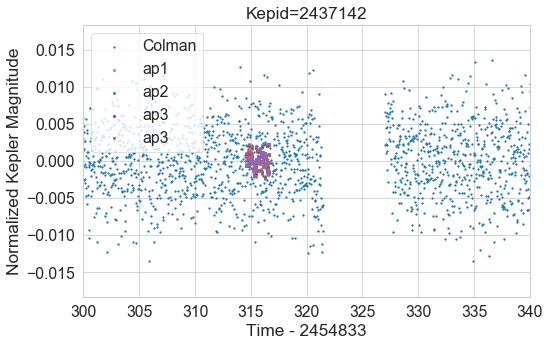

2437446
2437475
2437488


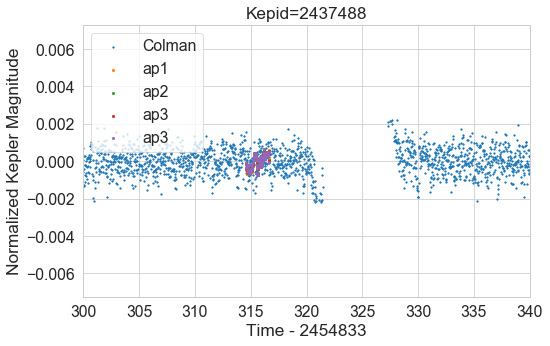

2437046
2437033
2437217
2437529


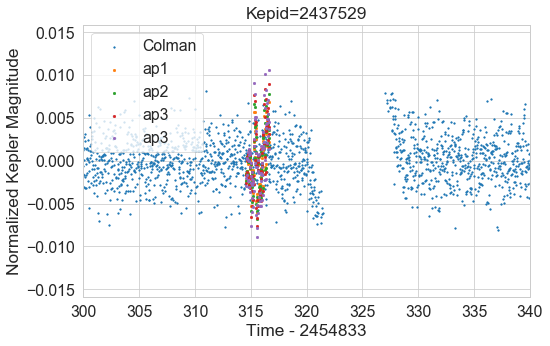

2437612
-999
2437577


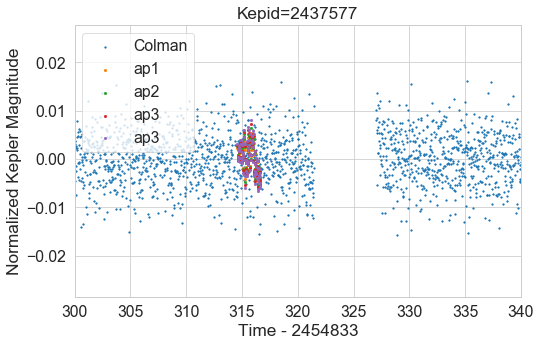

2436962
2437062


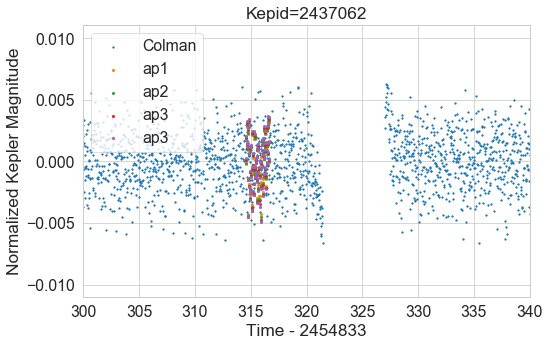

2437070
2436995


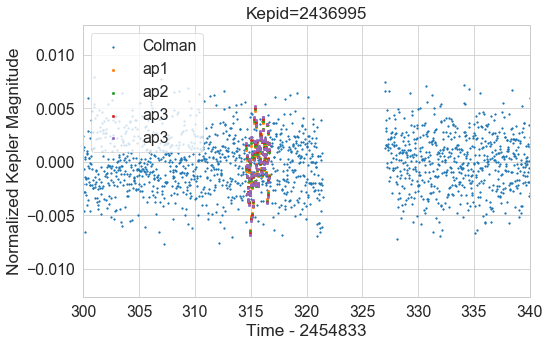

2436912


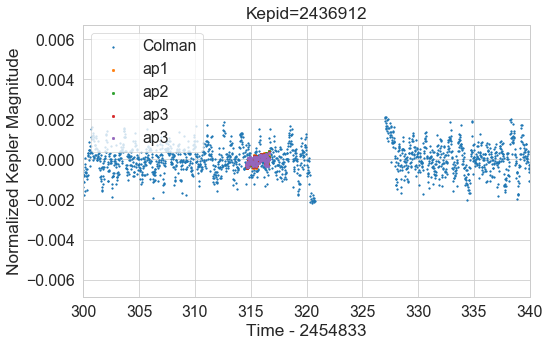

2437324
2437405
2569858
2437513


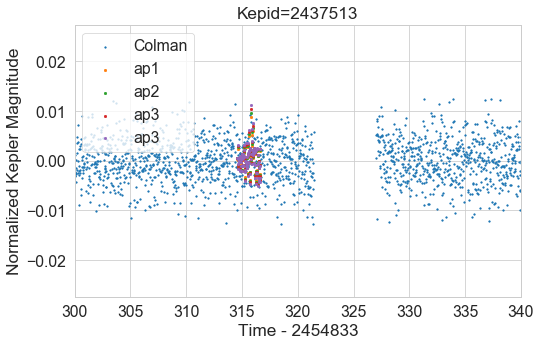

2570045
2569801


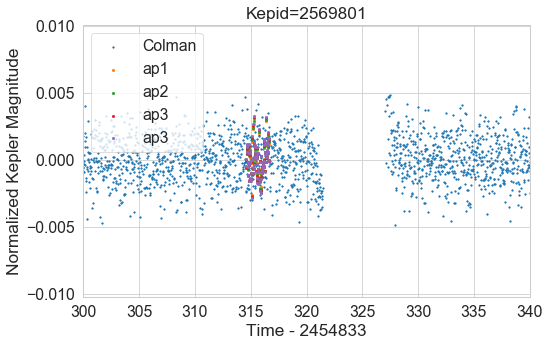

2569752


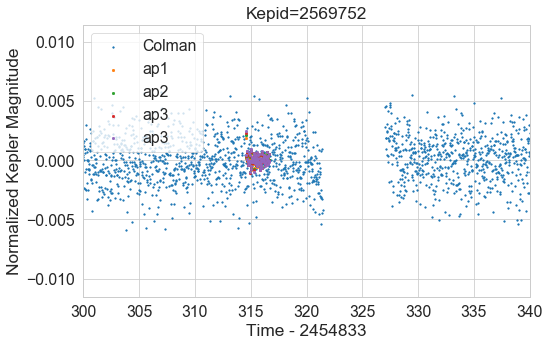

2569788
2570331
2570096


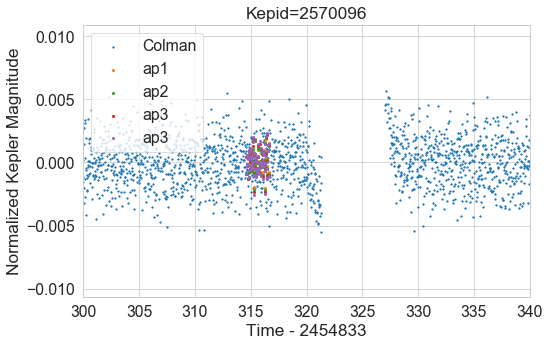

2570448
2569524
2569391
2569433
2569787
2569291
2297509
2437634


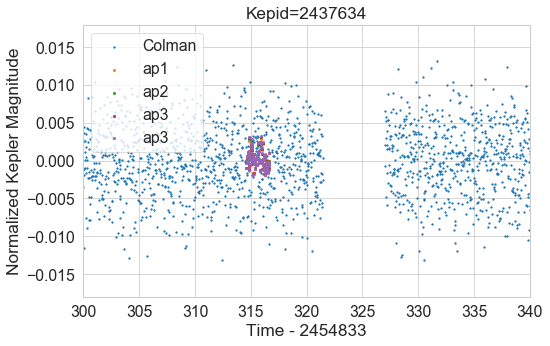

2437831
2437605
2437737
2438155


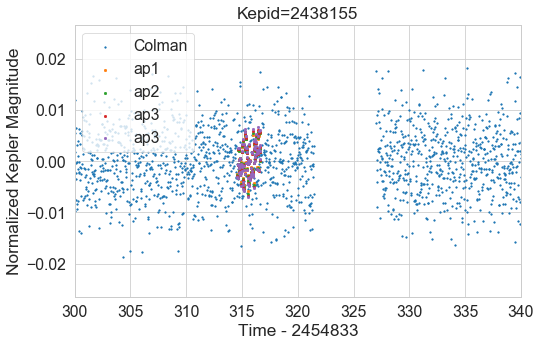

2438165
2438206
2437152
2437010
2437038
2436791
2436766


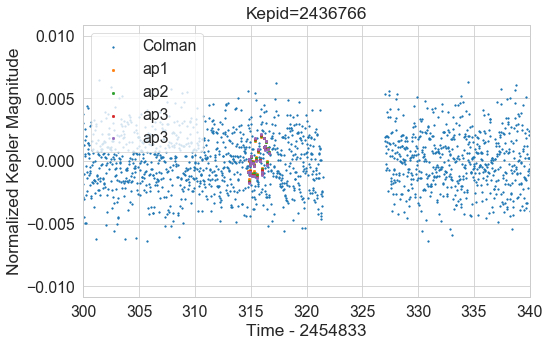

2437142


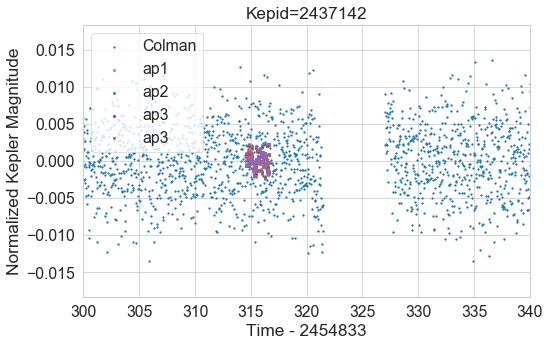

2437446
2437475
2437488


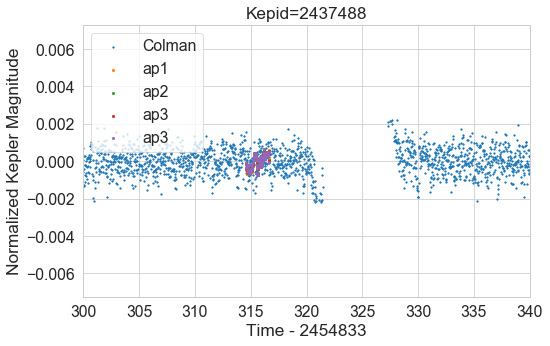

2437046
2437053


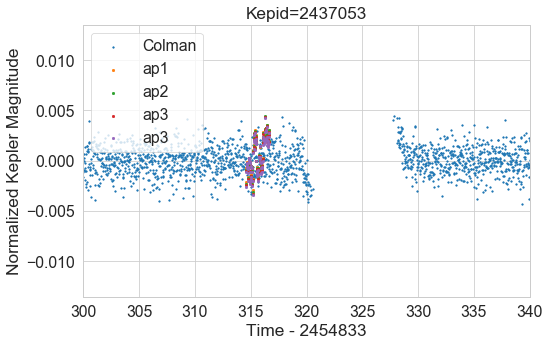

2437217
2437547


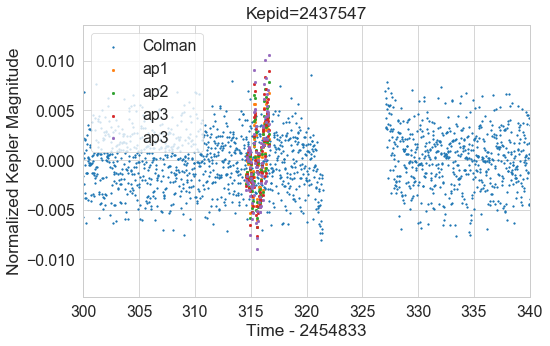

2437612
-999
2437577


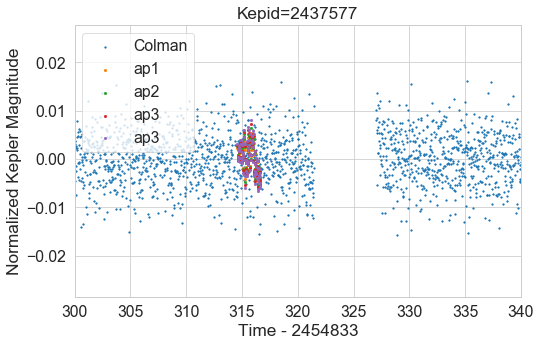

2436965
2437062


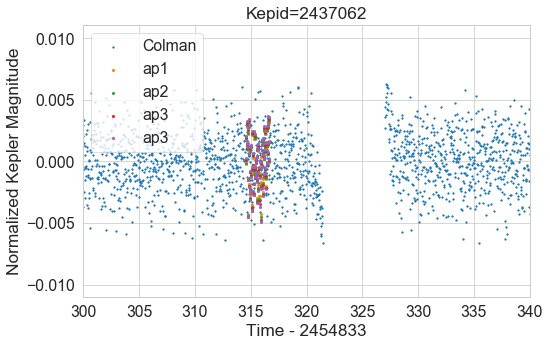

2437070
2436995


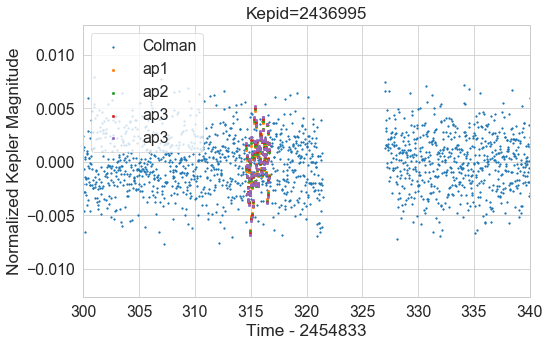

2436912


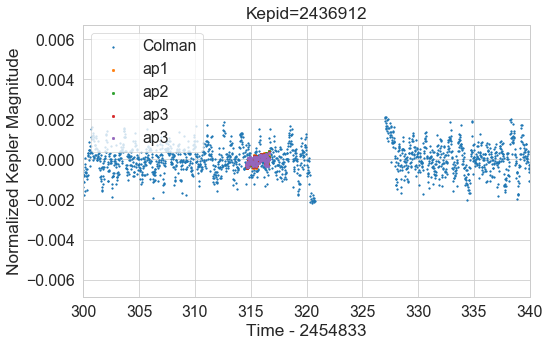

2437324
-999
2569858
2437513


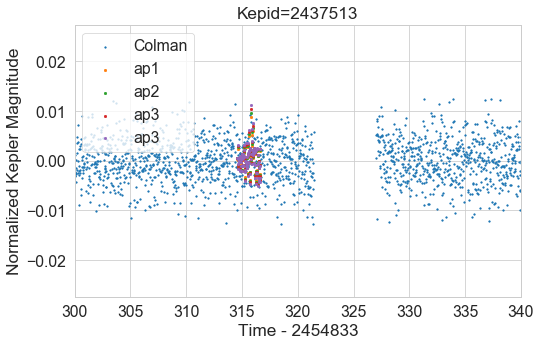

2570045
2569801


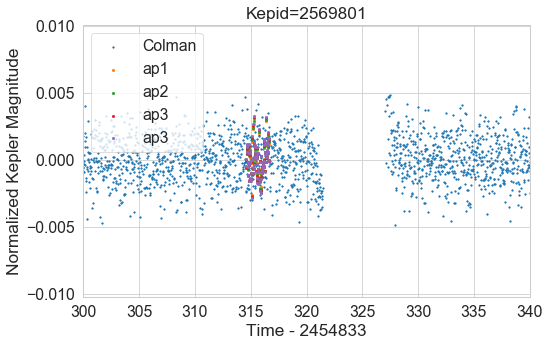

2569752


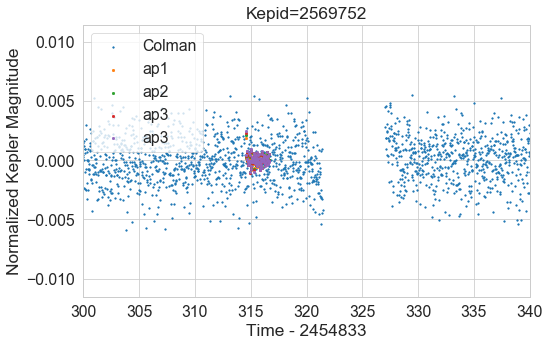

2569796
2570338
2570107
2570448
2569524
2569391
2569433
2569792
2569291


In [81]:
for i in range(1,len(t_lc)):
    Kepid=int(t_lc['KIC'][i])
    print(Kepid)
    if (Kepid in problems ):
        continue
    else:
        Colmanfile='/Users/msoaresfurtado/Dropbox/Research_NGC6791/Colman_stitched2/hlsp_iris_kepler_phot_kplr'+str(Kepid)+'-stitched_kepler_v1.0_lc.fits'
        if os.path.exists(Colmanfile):
            a=a+1
            hdulist = fits.open(Colmanfile)
            hdu1=hdulist[1].header
            binaryext = hdulist[1].data
            binarytable = Table(binaryext)
            #BJDREF=2454833
            colman_mags=-2.5*np.log10(binarytable['CORRECTED FLUX'])
            plt.scatter(binarytable['TIME'],binarytable['CORRECTED FLUX'],s=2,label='Colman')
            df=pd.read_table(t_lc['lc'][i],delim_whitespace=True,header=None)
            time=df[0]*0.5/24    
            cols=[10,13,16,19]
            mask = df[cols].applymap(lambda x: isinstance(x, (int, float)))
            df[cols] = df[cols].where(mask)
            df[10]=df[10]/np.nanmedian(df[10])-1
            plt.scatter(time,df[10],s=5,label='ap1')
            df[13]=df[13]/np.nanmedian(df[13])-1
            plt.scatter(time,df[13],s=5,label='ap2')
            df[16]=df[16]/np.nanmedian(df[16])-1
            plt.scatter(time,df[16],s=5,label='ap3')
            df[19]=df[19]/np.nanmedian(df[19])-1
            plt.scatter(time,df[19],s=5,label='ap4')
            plt.xlim(300,340)
            plt.legend(loc='upper left')
            plt.title('Kepid='+str(Kepid))
            plt.ylabel('Normalized Kepler Magnitude')
            plt.xlabel('Time - 2454833')
            plt.show()
            plt.close()

In [ ]:
for i in range(1,len(t_lc)):
    Kepid=int(t_lc['KIC'][i])
    print(Kepid)
    if (Kepid in problems ):
        continue
    else:
        Colmanfile='/Users/msoaresfurtado/Dropbox/Research_NGC6791/Colman_stitched2/hlsp_iris_kepler_phot_kplr'+str(Kepid)+'-stitched_kepler_v1.0_lc.fits'
        if os.path.exists(Colmanfile):
            a=a+1
            hdulist = fits.open(Colmanfile)
            hdu1=hdulist[1].header
            binaryext = hdulist[1].data
            binarytable = Table(binaryext)
            #BJDREF=2454833
            colman_mags=-2.5*np.log10(binarytable['CORRECTED FLUX'])
            plt.scatter(binarytable['TIME'],binarytable['CORRECTED FLUX'],s=50,label='Colman')
            df=pd.read_table(t_lc['lc'][i],delim_whitespace=True,header=None)
            time=df[0]*0.5/23.93    
            cols=[10,13,16,19]
            mask = df[cols].applymap(lambda x: isinstance(x, (int, float)))
            df[cols] = df[cols].where(mask)
            df[10]=df[10]/np.nanmedian(df[10])-1
            plt.scatter(time,df[10],s=15,label='ap1')
            df[13]=df[13]/np.nanmedian(df[13])-1
            plt.scatter(time,df[13],s=15,label='ap2')
            df[16]=df[16]/np.nanmedian(df[16])-1
            plt.scatter(time,df[16],s=15,label='ap3')
            df[19]=df[19]/np.nanmedian(df[19])-1
            plt.scatter(time,df[19],s=15,label='ap4')
            plt.xlim(314,318)
            plt.legend(loc='upper left')
            plt.title('Kepid='+str(Kepid))
            plt.ylabel('Normalized Kepler Magnitude')
            plt.xlabel('Time - 2454833')
            plt.show()
            plt.close()

Comparing Isabel's source with the large scatter

In [104]:
from astrobase import periodbase, checkplot

for i in range(0,1): #,len(t_lc)):
    Kepid=int(t_lc['KIC'][i])
    print(Kepid)
    if (Kepid in problems ):
        continue
    else:
        Colmanfile='/Users/msoaresfurtado/Dropbox/Research_NGC6791/Colman_stitched2/hlsp_iris_kepler_phot_kplr'+str(Kepid)+'-stitched_kepler_v1.0_lc.fits'
        if os.path.exists(Colmanfile):
            hdulist = fits.open(Colmanfile)
            binaryext = hdulist[1].data
            binarytable = Table(binaryext)
            times, mags, errs = binarytable['TIME'], binarytable['CORRECTED FLUX'],0.01*binarytable['CORRECTED FLUX']
            glsp = periodbase.pgen_lsp(times,mags,errs)
            bls=periodbase.bls_parallel_pfind(times,mags,errs)
            spdm = periodbase.stellingwerf_pdm(times,mags,errs)

            fileout='/Users/msoaresfurtado/Dropbox/Research_NGC6791/PKL_files/'+str(hdulist[0].header['HLSPTARG'].rsplit()[1])+'.pkl'
            print(fileout)
            cpf = checkplot.checkplot_pickle([glsp,spdm,bls],times, mags,errs,outfile=fileout,minbinelems=1, \
                                 objectinfo={'objectid': hdulist[0].header['HLSPTARG'],'ra': hdulist[0].header['RA_OBJ'],'decl': hdulist[0].header['DEC_OBJ'],'ndet': hdulist[0].header['TELAPSE']}) 
            cpfpng = checkplot.checkplot_pickle_to_png(fileout, 'checkplot-pickle.png')
            Image('checkplot-pickle.png')
            break

2297509
